# Compare Result

this notebook created for comparing result between predicted result from ML model and truth set 

In [1]:
!pip install venn

In [1]:
from venn import venn
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

from functools import reduce

In [3]:
columns = ["ID_Query","ID_Target","sequence_identity","alignment_length","number_of_mismatches","number_of_gap_openings", "start-position_in_query", "end-position_in_query", "start-position_in_target","end-position_in_target","E-value","bit_score"]

In [2]:
def plot_ven_AMP_NonAMP(sample_test,sample_groundtruth,prediced_set,truth_set):
    Samples = {
        sample_test:  set(prediced_set["ID"]),
        sample_groundtruth: set(truth_set['ID_Query']),
        }
    venn(Samples)
    venn(Samples, fmt="{percentage:.2f}%")    
    
def accuracy_cal( predict , total_AMPs):
    accuracy = (predict/total_AMPs )*100
    print(" Accuracy Percentage = %.2f" % accuracy)

## DECockroach

In [149]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result/DECockroach.len15.MLResult.plk")
DECockroach_ML

,ID,class
0,0,0
1,1,0
2,3,0
3,4,1
4,5,0
...,...,...
199,894298,0
200,894299,0
201,894303,0
202,894304,0


In [150]:
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())
DECockroach_len15_truth

,ID_Query,ID_Target,sequence_identity,alignment_length,number_of_mismatches,number_of_gap_openings,start-position_in_query,end-position_in_query,start-position_in_target,end-position_in_target,E-value,bit_score
0,143923,dbAMP_12224,0.550,20,9,0,1,20,44,63,4.967000e-04,31
1,143923,L03A000107|,0.550,20,9,0,1,20,66,85,4.967000e-04,31
2,775878,420_peptideDB.anti|peptideDB.anti,0.882,17,2,0,1,17,7,23,2.010000e-08,43
3,775878,1676_peptideDB.anti|peptideDB.anti,0.882,17,2,0,1,17,32,48,2.010000e-08,43
4,775878,1653_peptideDB.anti|peptideDB.anti,0.882,17,2,0,1,17,32,48,2.010000e-08,43
...,...,...,...,...,...,...,...,...,...,...,...,...
4076,178554,EN95455285|A|P81709|Lysozyme,0.588,17,7,0,1,17,102,118,5.571000e-04,30
4077,178554,EN60134206|A|P37712|Lysozyme,0.666,15,5,0,1,15,102,116,5.571000e-04,30
4078,178554,EN84379296|A|Q659U1|Lysozyme,0.588,17,7,0,1,17,120,136,5.571000e-04,30
4079,178554,EN34191792|A|Q659U0|Lysozyme,0.588,17,7,0,1,17,120,136,5.571000e-04,30


<AxesSubplot:>

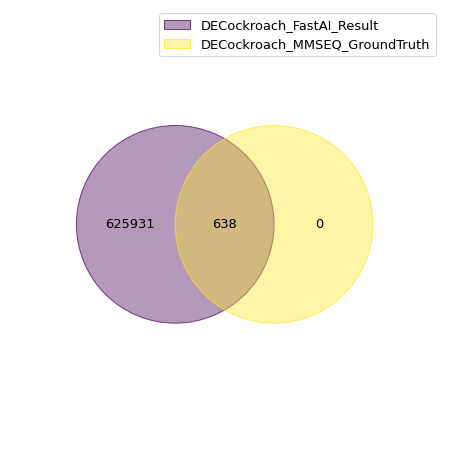

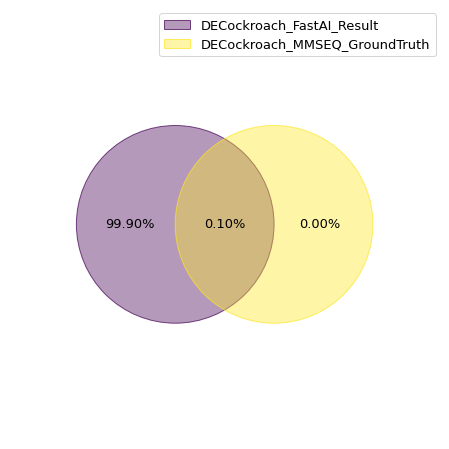

In [151]:
DECockroachSamples = {
    "DECockroach_FastAI_Result":  set(DECockroach_ML["ID"]),
    "DECockroach_MMSEQ_GroundTruth": set(DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
venn(DECockroachSamples, fmt="{percentage:.2f}%")

<AxesSubplot:>

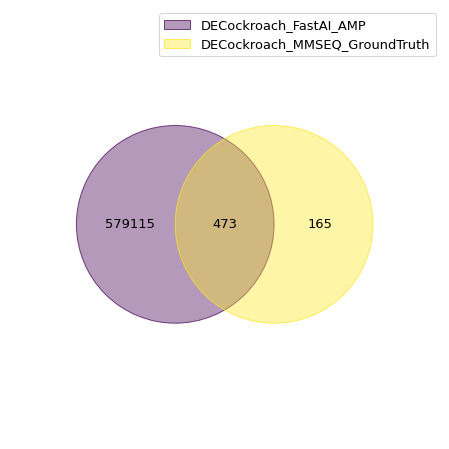

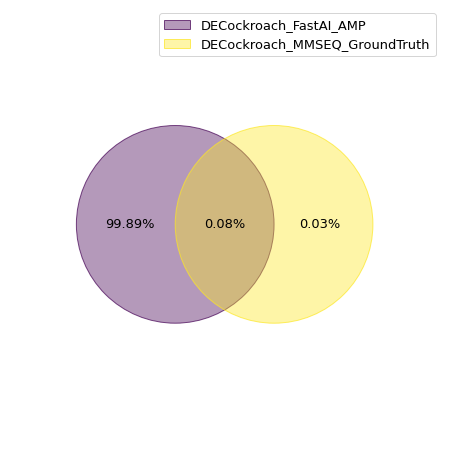

In [152]:
DECockroachSamples = {
    "DECockroach_FastAI_AMP":  set(DECockroach_AMPs_ML["ID"]),
    "DECockroach_MMSEQ_GroundTruth": set(DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
venn(DECockroachSamples, fmt="{percentage:.2f}%")

In [156]:
filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())
print(DECockroach_total_AMPS_with100)

77


<AxesSubplot:>

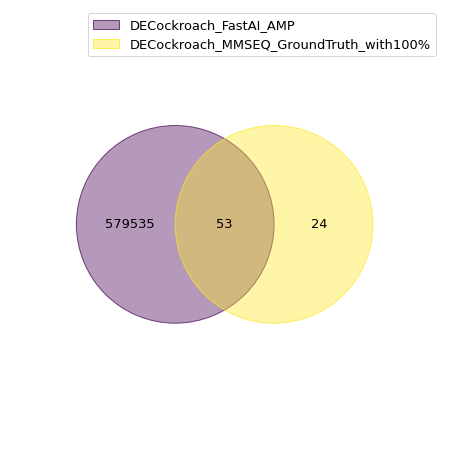

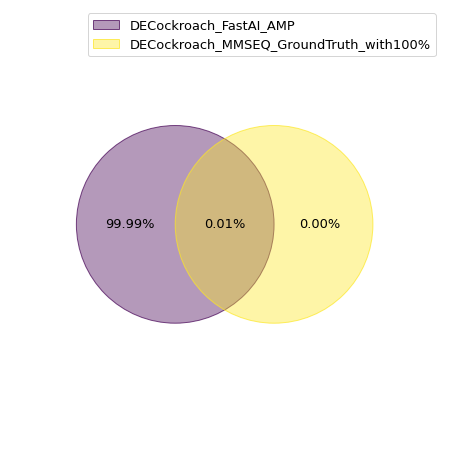

In [154]:
DECockroachSamples = {
    "DECockroach_FastAI_AMP":  set(DECockroach_AMPs_ML["ID"]),
    "DECockroach_MMSEQ_GroundTruth_with100%": set(filtered_DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
venn(DECockroachSamples, fmt="{percentage:.2f}%")

In [129]:
accuracy = (473/DECockroach_total_AMPS )*100
print("%.2f" % accuracy)
accuracy = (53/DECockroach_total_AMPS_with100 )*100
print("%.2f" % accuracy)

74.14
68.83


# ---------------------------------------

From A)  first we use prediction result ( which contains both NonAMP  and AMP  )  ( Purple bubble here )  intersect with a ground truth set.

Next , In B) we exclude the non AMPs out from prediction results , we see a high number in ( purple bubble). This means  Most of the sequence predict to be AMP rather than to be a non AMP (you  can see the  number  in purple part between A and B) which is not likely to be  true . So in this case show a Very high false positive rate on the prediction (i.e., predict Non AMP to be AMP , high amount in purple color in Venn diagram),  
(If we calculate non amp  625K-579K = 46K.)

Next if we look into yellow bubble , there is a remaining  number  in yellow which we consider it as a false negative  because the model predict these  as the Non AMPs.

## Version 2 , FastAI

In [4]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_FastAI/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

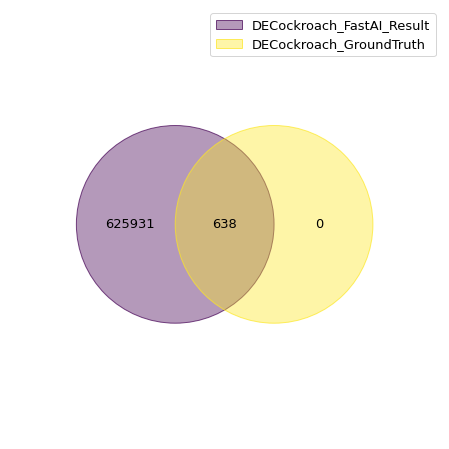

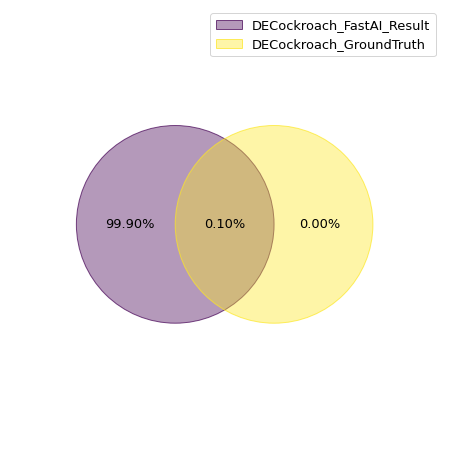

In [5]:
# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_FastAI_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

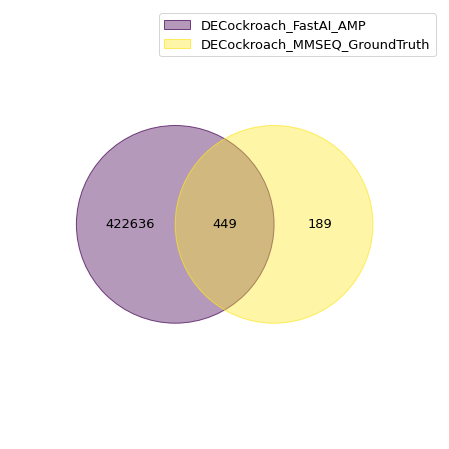

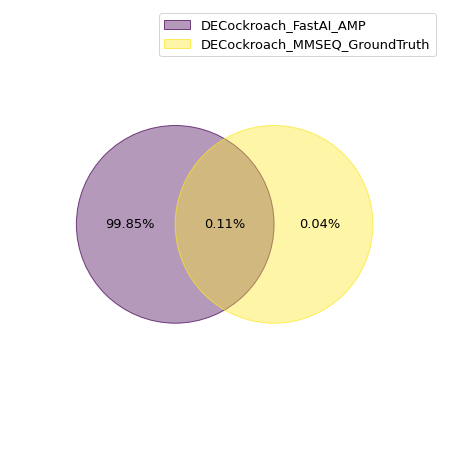

In [6]:
# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_FastAI_AMP","DECockroach_MMSEQ_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )


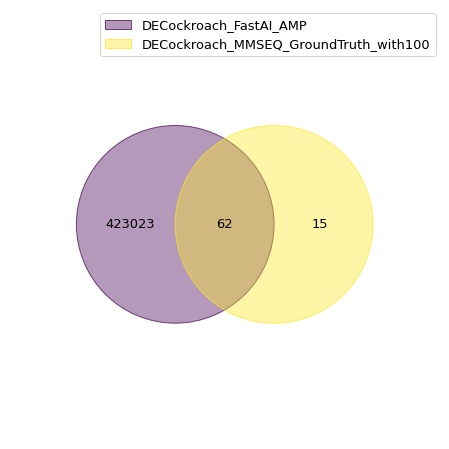

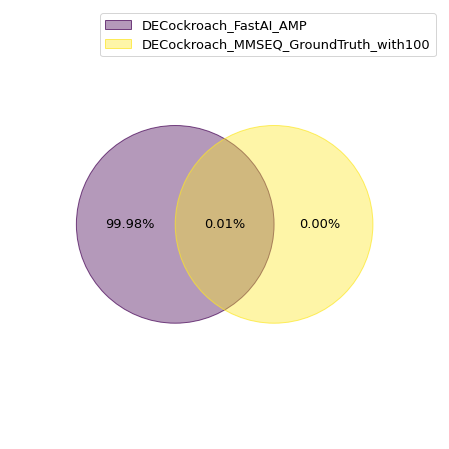

In [7]:
# AMP only compares with filtering 100% seq identity on ground truth
filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())
plot_ven_AMP_NonAMP("DECockroach_FastAI_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth )

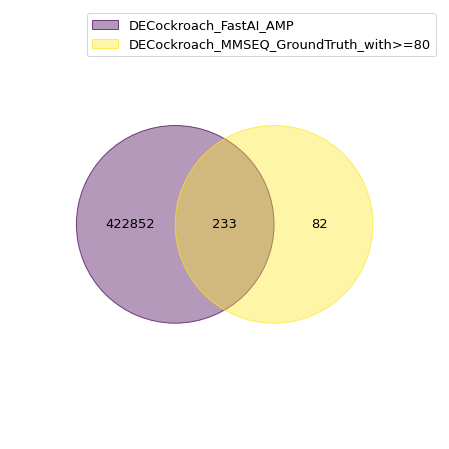

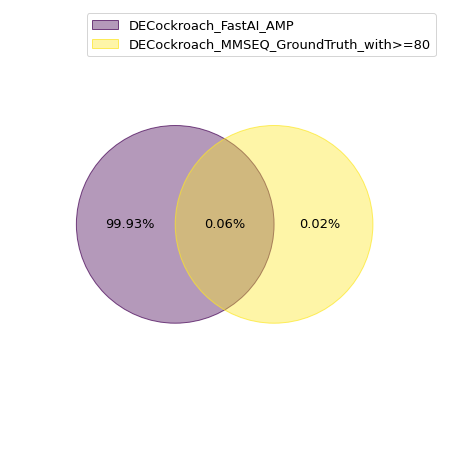

In [8]:
# 80-100%
filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] >= 0.8]
DECockroach_total_AMPS_with80 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())
plot_ven_AMP_NonAMP("DECockroach_FastAI_AMP","DECockroach_MMSEQ_GroundTruth_with>=80", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth )

In [9]:
# total 
accuracy_cal(449, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(62, DECockroach_total_AMPS_with100 )
# 80-100% similarity 
accuracy_cal(233, DECockroach_total_AMPS_with80 )

 Accuracy Percentage = 70.38
 Accuracy Percentage = 80.52
 Accuracy Percentage = 73.97


## with length <= 200

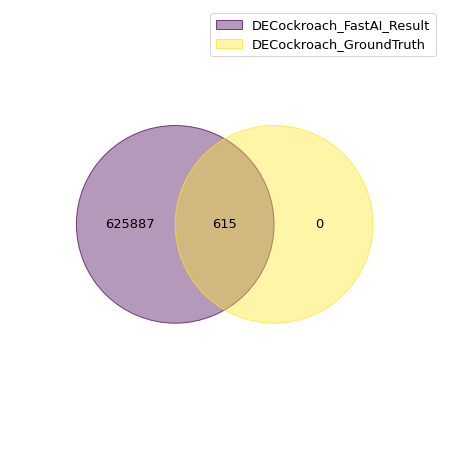

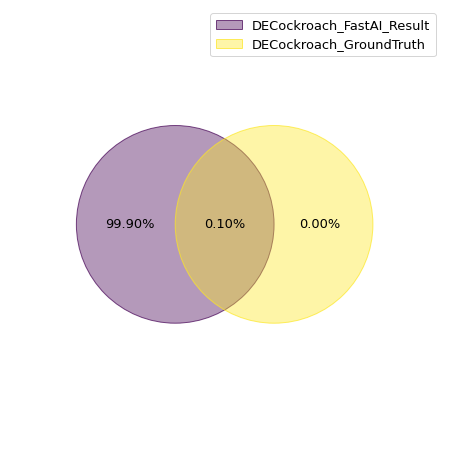

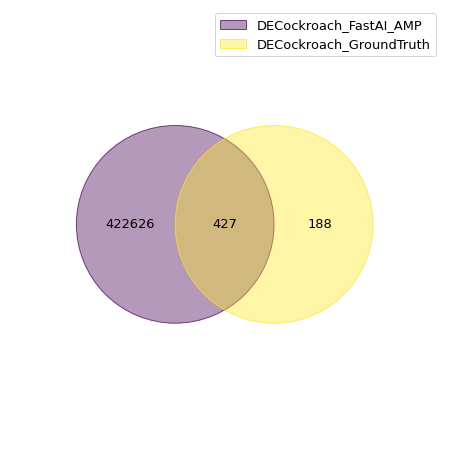

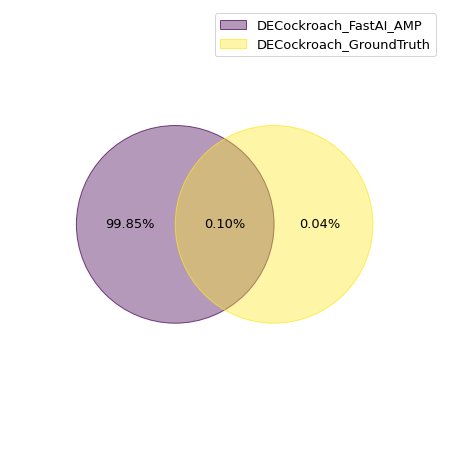

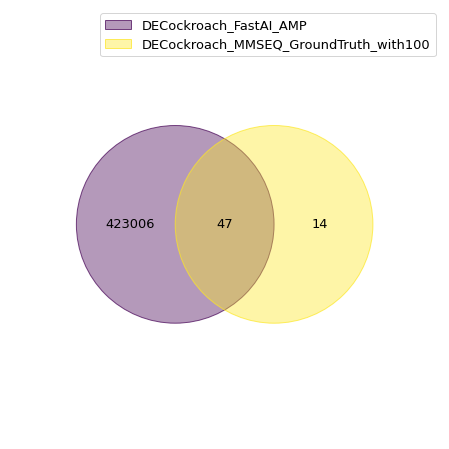

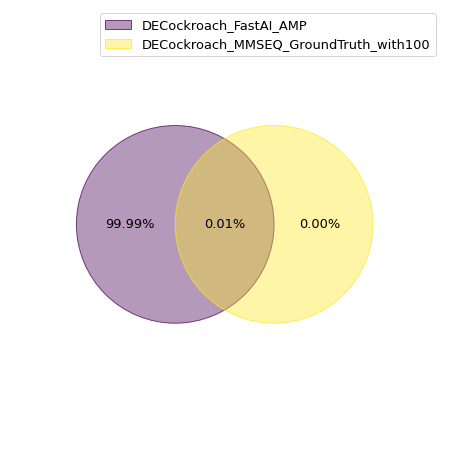

In [80]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_FastAI/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output200/DECockroach.len200.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 200]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_FastAI_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_FastAI_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_FastAI_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth )

In [81]:
# total 
accuracy_cal(427, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(47, DECockroach_total_AMPS_with100 )

 Accuracy Percentage = 69.43
 Accuracy Percentage = 77.05


## with length <= 30

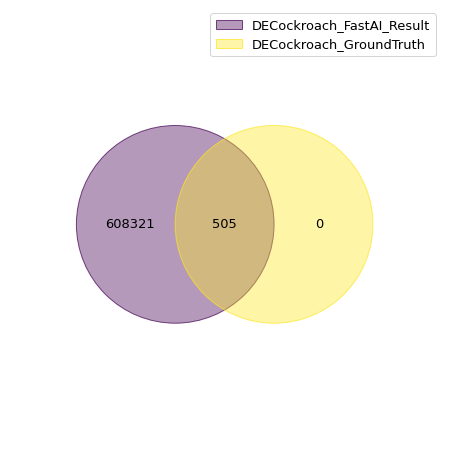

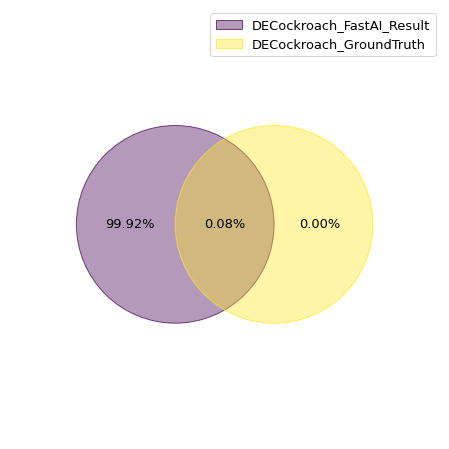

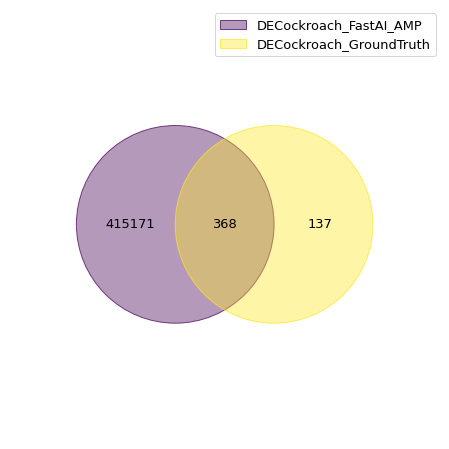

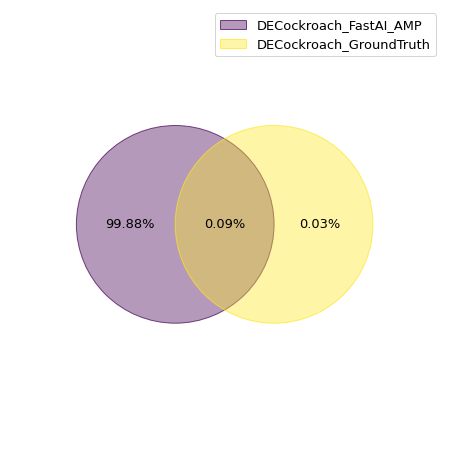

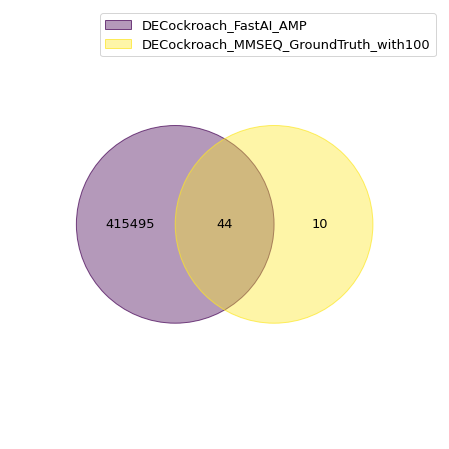

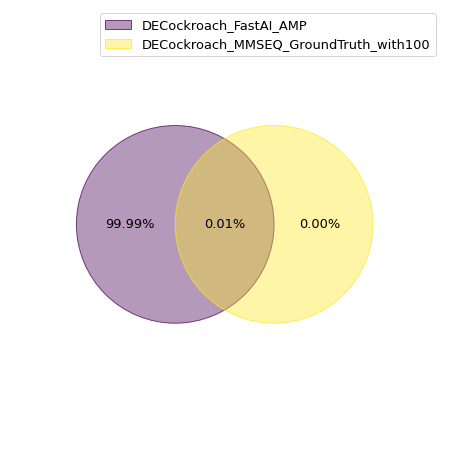

In [76]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_FastAI/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output30/DECockroach.len30.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 30]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_FastAI_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_FastAI_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_FastAI_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth )

In [78]:
# total 
accuracy_cal(368, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(44, DECockroach_total_AMPS_with100 )

 Accuracy Percentage = 72.87
 Accuracy Percentage = 81.48


## Version 2 , CNN

In [94]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_CNN/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

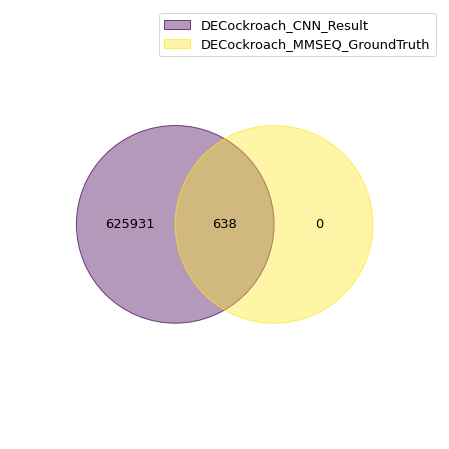

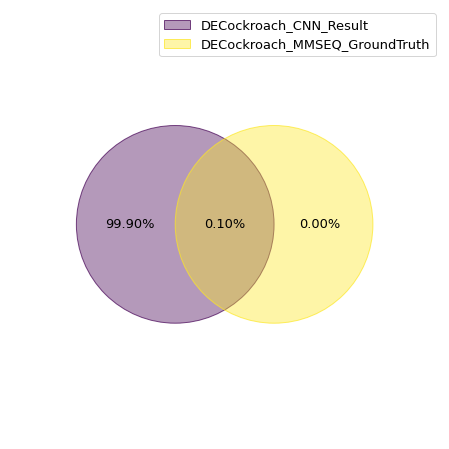

In [95]:
# AMP and Non AMP compare with ground truth
DECockroachSamples = {
    "DECockroach_CNN_Result":  set(DECockroach_ML["ID"]),
    "DECockroach_MMSEQ_GroundTruth": set(DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
venn(DECockroachSamples, fmt="{percentage:.2f}%")

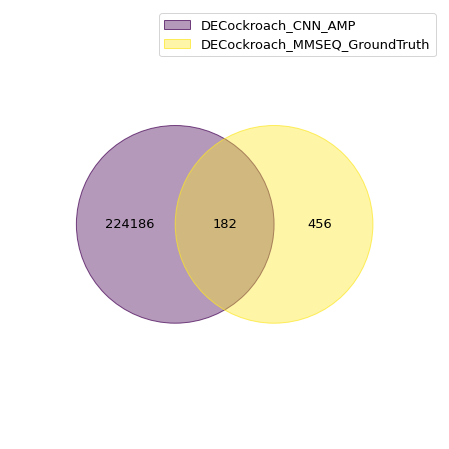

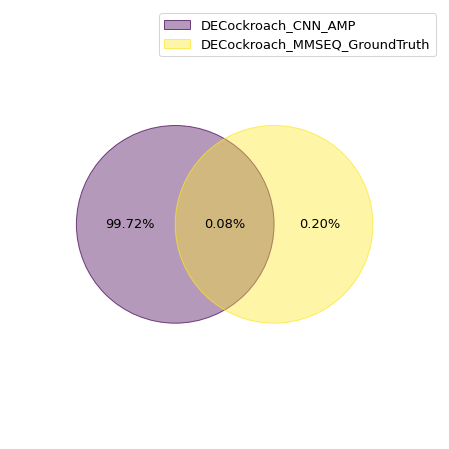

In [96]:
# AMP only compares with ground truth
DECockroachSamples = {
    "DECockroach_CNN_AMP":  set(DECockroach_AMPs_ML["ID"]),
    "DECockroach_MMSEQ_GroundTruth": set(DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
venn(DECockroachSamples, fmt="{percentage:.2f}%")

For sequence identiy s equal to 100%

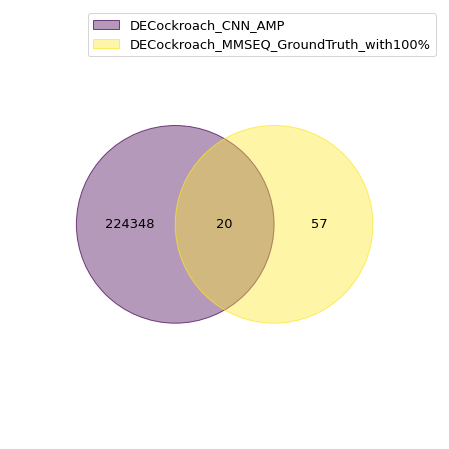

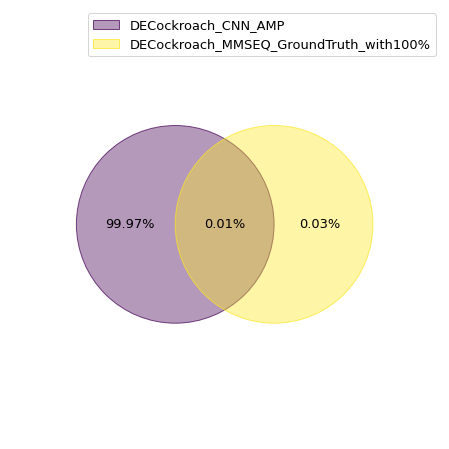

In [97]:
# AMP only compares with filtering 100% seq identity on ground truth
filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())
DECockroachSamples = {
    "DECockroach_CNN_AMP":  set(DECockroach_AMPs_ML["ID"]),
    "DECockroach_MMSEQ_GroundTruth_with100%": set(filtered_DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
venn(DECockroachSamples, fmt="{percentage:.2f}%")

In [98]:
accuracy = (182/DECockroach_total_AMPS )*100
print("%.2f" % accuracy)
accuracy = (20/DECockroach_total_AMPS_with100 )*100
print("%.2f" % accuracy)

28.53
25.97


## with <= 200

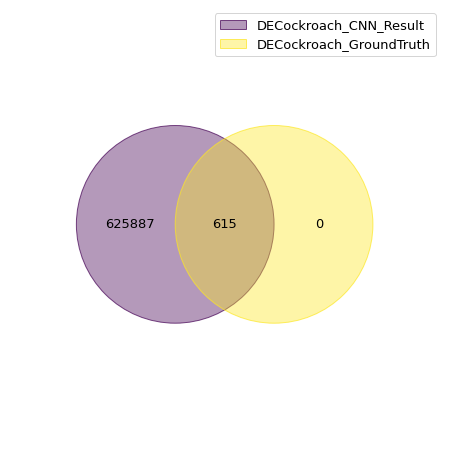

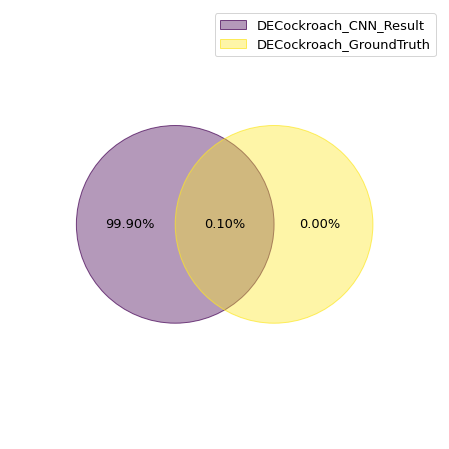

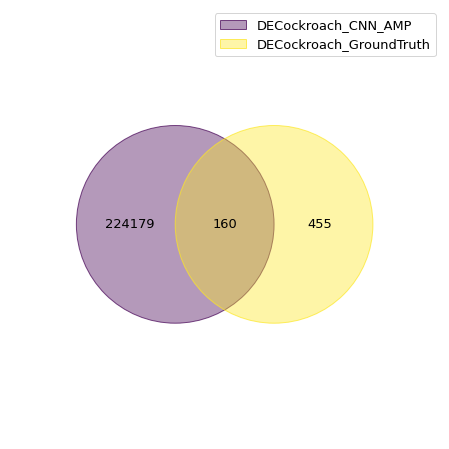

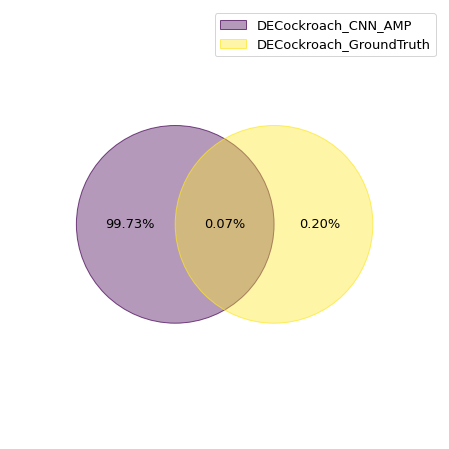

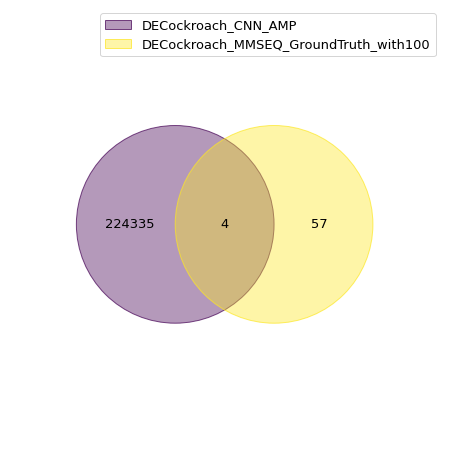

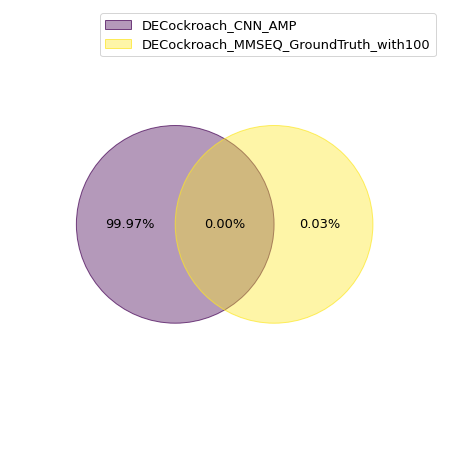

In [99]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_CNN/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output200/DECockroach.len200.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 200]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_CNN_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_CNN_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_CNN_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth )

In [100]:
accuracy = (160/DECockroach_total_AMPS )*100
print("accuracy %.2f" % accuracy)
accuracy = (4/DECockroach_total_AMPS_with100 )*100
print("accuracy %.2f" % accuracy)

accuracy 26.02
accuracy 6.56


## with <=30 

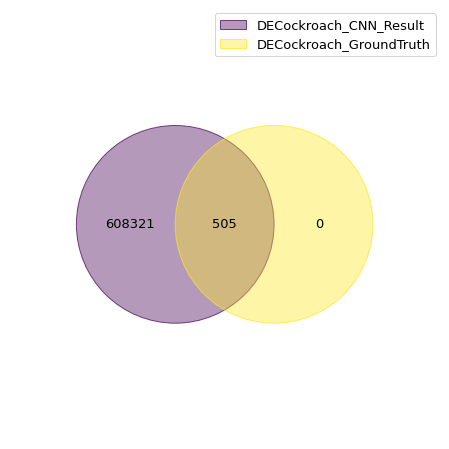

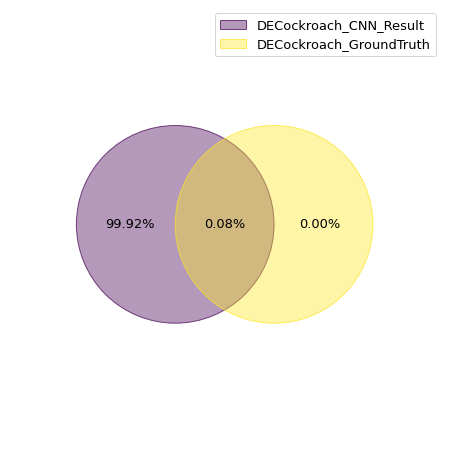

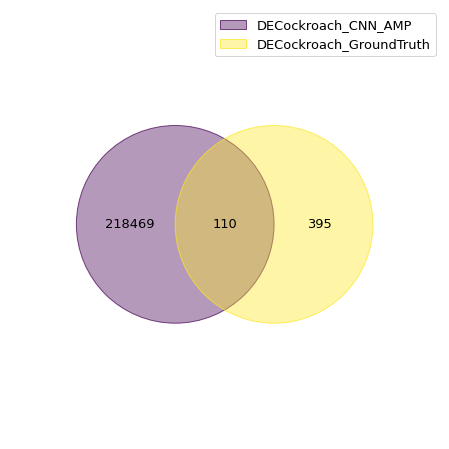

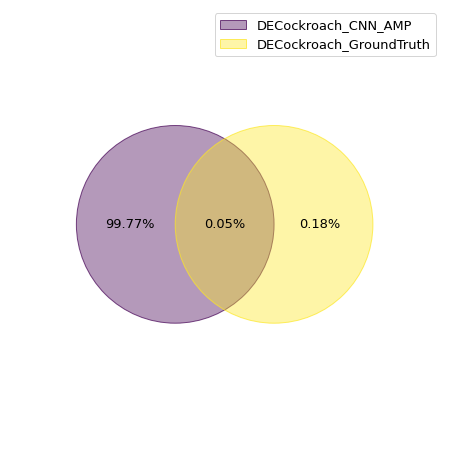

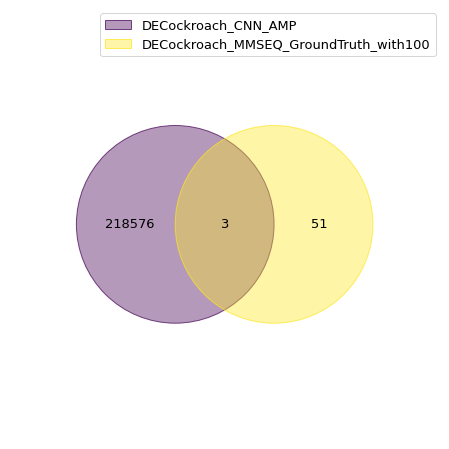

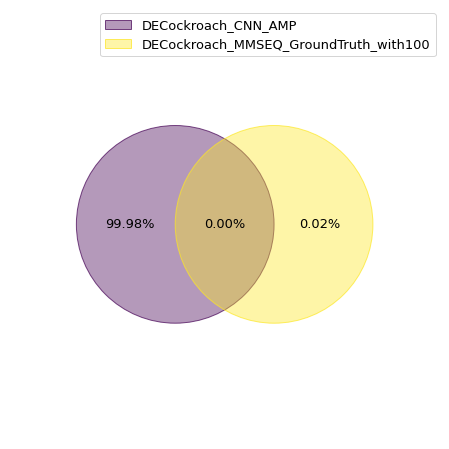

In [101]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result_2_CNN/DECockroach.len15.MLResult.plk")
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output30/DECockroach.len30.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
DECockroach_ML = DECockroach_ML[DECockroach_ML["length"] <= 30]

#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())

# AMP and Non AMP compare with ground truth
plot_ven_AMP_NonAMP("DECockroach_CNN_Result","DECockroach_GroundTruth", DECockroach_ML,DECockroach_len15_truth )

# AMP only compares with ground truth
plot_ven_AMP_NonAMP("DECockroach_CNN_AMP","DECockroach_GroundTruth", DECockroach_AMPs_ML,DECockroach_len15_truth )

filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())

plot_ven_AMP_NonAMP("DECockroach_CNN_AMP","DECockroach_MMSEQ_GroundTruth_with100", DECockroach_AMPs_ML,filtered_DECockroach_len15_truth )

In [102]:
# total 
accuracy_cal(110, DECockroach_total_AMPS )
# 100% similarity 
accuracy_cal(3, DECockroach_total_AMPS_with100 )

 Accuracy Percentage = 21.78
 Accuracy Percentage = 5.56
